# A2Q1: SparseMatMult

In [1]:
import numpy as np
from scipy.sparse import dok_matrix
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
def SparseMatMult(G, x):
    '''
      y = SparseMatMult(G, x)
      
      Multiplies a vector (x) by a sparse matrix G,
      such that y = G @ x .
      
      Inputs:
        G is an NxM dictionary-of-keys (dok) sparse matrix
        x is an M-vector
      
      Output:
        y is an N-vector
    '''
    rows,cols = G.nonzero()
    Nrows,Ncols = np.shape(G)
    y = np.zeros(Nrows)

    # === YOUR CODE HERE
    for n in range(rows.size):
        row_index = rows[n]
        col_index = cols[n]
        y[row_index] =  y[row_index] + G[row_index, col_index] * x[col_index]
    return y

# A2Q2: Page Rank

In [3]:
def PageRank(G, alpha):
    '''
     p, iters = PageRank(G, alpha)

     Computes the Google Page-rank for the network in the adjacency matrix G.
     
     Note: This function never forms a full RxR matrix, where R is the number
           of node in the network.

     Input
       G     is an RxR adjacency matrix, G[i,j] = 1 iff node j projects to node i
             Note: G must be a dictionary-of-keys (dok) sparse matrix
       alpha is a scalar between 0 and 1

     Output
       p     is a probability vector containing the Page-rank of each node
       iters is the number of iterations used to achieve a change tolerance
             of 1e-8 (changes to elements of p are all smaller than 1e-8)

     [-1] if code is not readable
    '''
    
    R = np.shape(G)[0]  # R = Number of nodes
    p = np.zeros(R, dtype=float)
    iters = 0

    # === YOUR CODE HERE ===
    P = deepcopy(G)
    p = np.ones(R) / R
    e = np.ones(R)
    d = np.zeros(R, dtype=float)
    deg = np.sum(G, axis=0)
    for i in range(R):
        if deg[0, i] == 0:
            d[i] = 1
        for r in range(R):
            P[r,i] /= deg[0,i] 
            
    while True:
        new_p = alpha*SparseMatMult(P, p) + (d@p)*alpha/R*e + (1-alpha)/R*e
        iters = iters + 1
        diff = new_p - p
        if np.max(diff) < 0.00000001:
            return p, iters
        p = new_p


# A2Q3: Network Experiments

## (a) Create sparse matrix

In [4]:
# === YOUR CODE HERE ===
G = dok_matrix((11,11), dtype=np.float32)
G[1,0] = 1
G[2,0] = 1
G[3,0] = 1
G[4,0] = 1
G[0,1] = 1
G[2,1] = 1
G[3,1] = 1
G[4,1] = 1
G[10,1] = 1
G[0,2] = 1
G[1,2] = 1
G[3,2] = 1
G[4,2] = 1
G[0,3] = 1
G[1,3] = 1
G[2,3] = 1
G[4,3] = 1
G[0,4] = 1
G[1,4] = 1
G[2,4] = 1
G[3,4] = 1
G[1,5] = 1
G[6,5] = 1
G[7,5] = 1
G[8,5] = 1
G[9,5] = 1
G[10,5] = 1
G[5,6] = 1
G[5,7] = 1
G[5,8] = 1
G[5,9] = 1
G[5,10] = 1
G[1,10] = 1

## (b) Run PageRank on network

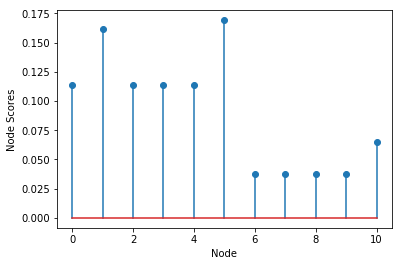

In [5]:
# === YOUR CODE HERE ===
p,iters = PageRank(G, 0.85)
plt.stem(p);
plt.xlabel('Node')
plt.ylabel('Node Scores');

## (c) Extreme $\alpha$ Values

In [6]:
# Call PageRank over a range of alpha values
a_value = 0
A = []
I = []
while a_value <= 1:
    p,iters = PageRank(G, a_value)
    A.append(a_value)
    I.append(iters)
    a_value += 0.05

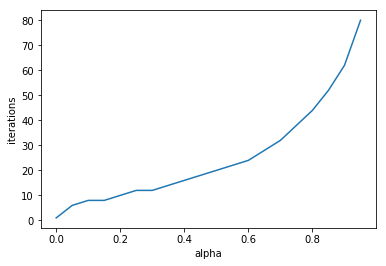

In [7]:
# Plot alpha vs iterations
plt.plot(A, I);
plt.xlabel('alpha')
plt.ylabel('iterations');

# It was found that as alpha increases, the number of iterations also increases
# It was also found that the number of iterations increases slowly as alpha increases
#     from 0.0 to 0.4, but the growth rate is increasing as alpha gets higher than 0.4

## (d) Stem plots of Scores

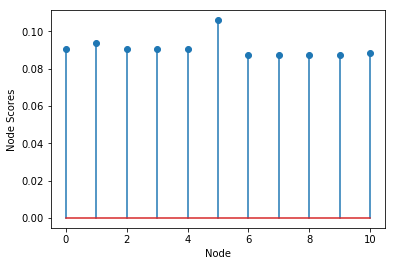

In [8]:
# Stem plot for 0.05
p,iters = PageRank(G, 0.05)
plt.stem(p);
plt.xlabel('Node')
plt.ylabel('Node Scores');

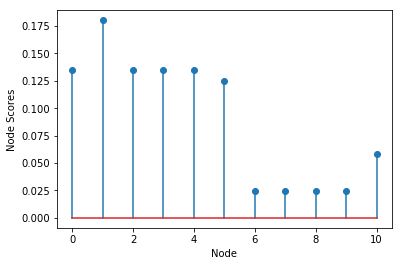

In [9]:
# Stem plot for 0.95
p,iters = PageRank(G, 0.95)
plt.stem(p);
plt.xlabel('Node')
plt.ylabel('Node Scores');

YOUR ANSWER TO THE QUESTION IN 3(d).

(double-click to edit)

Having a low a-value will result in a probability distribution cloer to a uniform distribution in node scores. Meaning that each web page will have a similar chance of being visited, and the network adjacency graph/the actual links between web pages will have less impact on the chance being visited.